# Pokemon Analysis

### Table of Contents
1. [Analysis](##analysis)
2. [Generation](##generation)
3. [Type](##type)
4. [Height & Weight](##height-&-weight)
5. [Gender Encounter Rate](##gender-encounter-rate)
6. [Get Rate](##get-rate)
7. [Stats](#stats-on-pokemon)

### Summary of Analysis


## Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import os

In [2]:
# Create a dataframe from the csv file saved in the data folder
df = pd.read_csv('data/Pokedex_Ver_SV2.csv')

# Create a dataframe with the unique number of pokemon (merging forms)
pokedex = df.drop_duplicates(subset=['Original_Name'], keep='first').copy()

# Count the number of unique pokemon
count_pokedex = pokedex['Original_Name'].count()

# Create a dataframe with all of the pokemon
national_dex = df.copy()

# Count the number of pokemon in national_dex
count_national_dex = national_dex['Original_Name'].count()

# pokedex.head()
# national_dex.head()

## Generation
* Mode
* Bar Chart of each generation
* ~~Comparision of same type of pokemon across generations (t-test); Create a dataframe that has the 1 generation and the last generation released~~

In [3]:
# Find the most common Generation (the mode)
mode_generation = pokedex['Generation'].mode()
mode_generation

0    5
Name: Generation, dtype: int64

<Axes: xlabel='Generation', ylabel='count'>

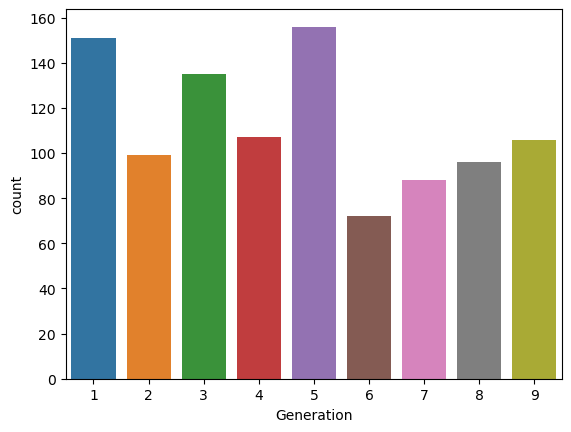

In [4]:
# Create a bar chart of the generations
sns.countplot(x='Generation', data=pokedex)

## Type
* Percentage, frequencies, bar chart - How many are in each type?
* Create column to combine type 1 and type 2 columns (alphabetical order on combination)
* Bar chart of each type combination
* Focus on sections of the data that are interesting
* Which combinations are missing or not well represented?
* Which combinations are the most frequent?

## Height & Weight
* Scatterplot, with regression line (correlation)
* Point out outliers if they exist
* Using gender as a grouping variable for scatterplot

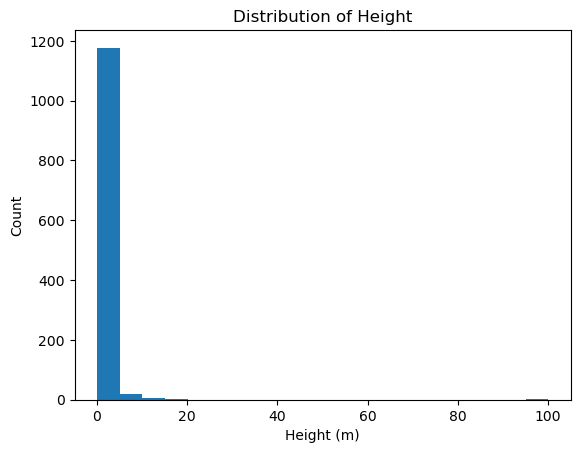

In [5]:
# Distribution of Height
plt.hist(national_dex['Height'], bins=20)
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

[Text(0.5, 0, 'Height (m)'), Text(0.5, 1.0, 'Box Plot of Height')]

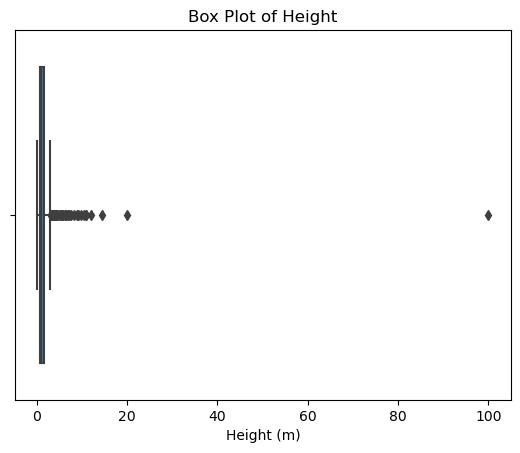

In [6]:
# Box plot of Height
height_boxplot = sns.boxplot(x=national_dex['Height'])
height_boxplot.set(xlabel='Height (m)', title='Box Plot of Height')

In [7]:
# There appears to be one clear outlier on height
# Create a dataframe that excludes the outlier
national_dex_no_outlier = national_dex[national_dex['Height'] < 90]
whats_the_new_max_height = national_dex_no_outlier['Height'].max()
# whats_the_new_max_height

# Height is positively skewed so median would be a better measure of central tendency
# Median height of pokemon
median_height = national_dex_no_outlier['Height'].median()
print(f"Median Height: {median_height}")



Median Height: 1.0


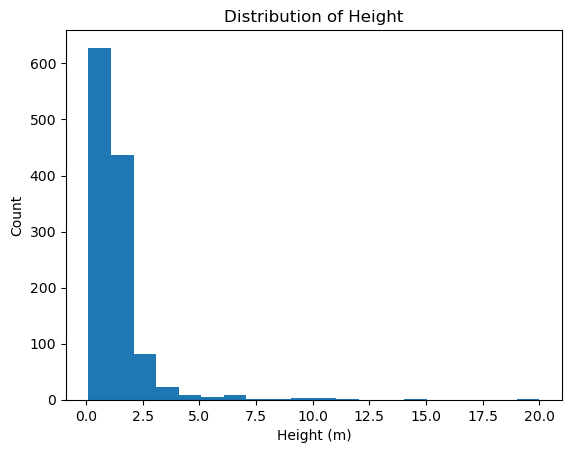

In [8]:
# Revised distribution of Height
plt.hist(national_dex_no_outlier['Height'], bins=20)
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

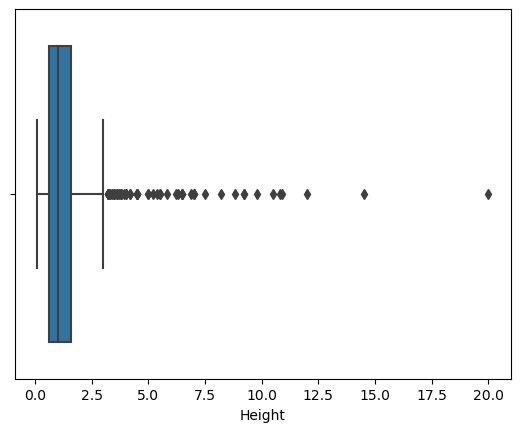

In [9]:
# Still skewed, but better!
# Box plot of Height
height_boxplot = sns.boxplot(x=national_dex_no_outlier['Height'])

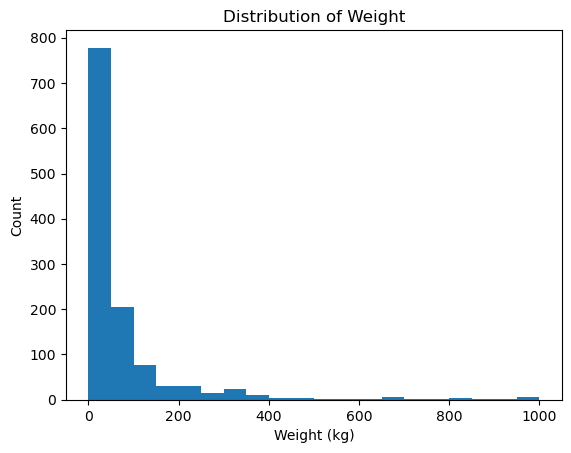

In [10]:
# Distribution of Weight
plt.hist(national_dex_no_outlier['Weight'], bins=20)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.title('Distribution of Weight')
plt.show()

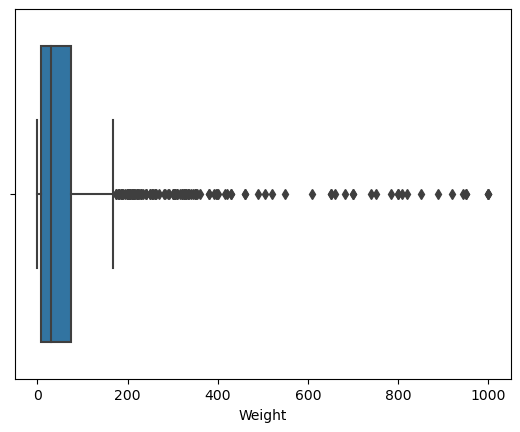

In [11]:
# Box plot of Weight
weight_boxplot = sns.boxplot(x=national_dex_no_outlier['Weight'])

# There are some potential outliers, but they are all near each other so it is reasonable to keep them

In [12]:
# Weight is positively skewed so median would be a better measure of central tendency
# Median weight of pokemon
median_weight = national_dex_no_outlier['Weight'].median()
print(f"Median Weight: {median_weight}")

Median Weight: 30.0


In [13]:
# Height and Weight is skewed, so Spearman's rho would be better than Pearsons
corr, pval = spearmanr(national_dex_no_outlier['Height'], national_dex_no_outlier['Weight'])
print(f"Spearman's rho: {corr}")
print(f"P-value: {pval}")

# There is a strong positive correlation between height and weight

Spearman's rho: 0.844481710264344
P-value: 0.0


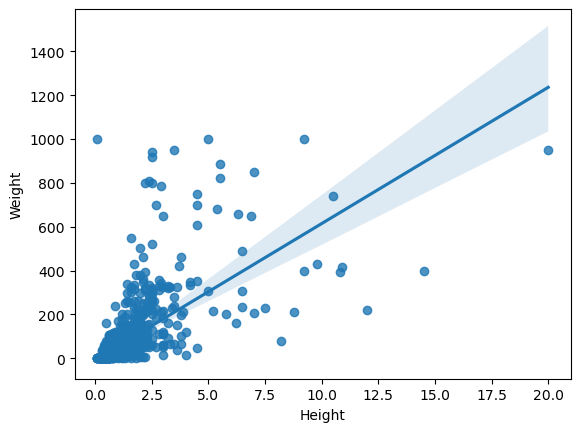

In [14]:
# Create a scatterplot of height vs weight
height_by_weight = sns.regplot(x='Height', y='Weight', data=national_dex_no_outlier)

## Gender Encounter Rate
* ~~Overlapping Normal plots?~~
* Check if the unique values are the same for gender encounter
* Add photos for the different encounter rates

In [15]:
# What are the unique combinations of Gender_Male, Gender_Female_, and Gender_Unknown?

# Select only the gender columns
gender_col = ["Gender_Male", "Gender_Female", "Gender_Unknown"]
unique_gender_rate = national_dex.loc[:, gender_col].copy()

# Sort the columns
unique_gender_rate = unique_gender_rate.sort_values(by=["Gender_Female"])

# Create a column that concatenates the gender rates
unique_gender_rate['Gender_Combination'] = unique_gender_rate.apply(lambda row: "M: " + str(row["Gender_Male"]) + ", F: " + str(row["Gender_Female"]) + ", U: " + str(row["Gender_Unknown"]), axis=1)

# How many unique combinations of the Gender_Combination column
num_unique_gender_rate = unique_gender_rate.groupby('Gender_Combination').size()

num_unique_gender_rate

# This information can be used to create a figure in excel

Gender_Combination
M: 0.0, F: 0.0, U: 100.0    196
M: 0.0, F: 100.0, U: 0.0     46
M: 100.0, F: 0.0, U: 0.0     37
M: 12.5, F: 87.5, U: 0.0      2
M: 25.0, F: 75.0, U: 0.0     31
M: 50.0, F: 50.0, U: 0.0    724
M: 75.0, F: 25.0, U: 0.0     22
M: 87.5, F: 12.5, U: 0.0    145
dtype: int64

## Get Rate
* mean, median, standard deviation
* Histogram, boxplot, normal plot
* Which pokemon have the highest and lowest catch rates?

In [16]:
# Find the mean, median, and standard deviation for Get_Rate
mean_get_rate = national_dex['Get_Rate'].mean()
median_get_rate = national_dex['Get_Rate'].median()
std_get_rate = national_dex['Get_Rate'].std()

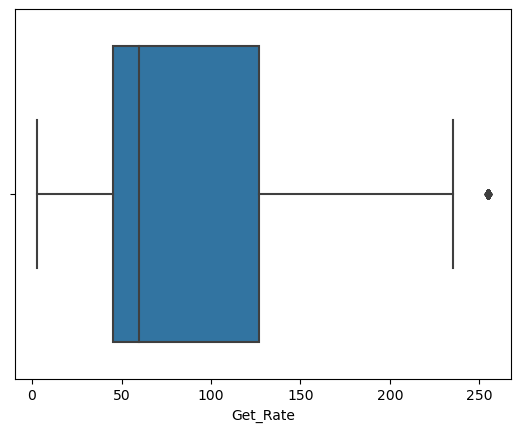

In [17]:
# Create a boxplot of Get_Rate
get_rate_boxplot = sns.boxplot(x=national_dex['Get_Rate'])

In [18]:
# Find the top 5 pokemon with the highest Get_Rate
top_5_get_rate = national_dex.sort_values(by=['Get_Rate'], ascending=False).head(5)
top_5_get_rate

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
246,194,194_0,Wooper,Paldean Wooper,9,0.4,11.0,Poison,Ground,Poison Point,...,25,25,15,210,1,0,0,0,0,0
633,519,519_0,Pidove,Pidove,5,0.3,2.1,Normal,Flying,Big Pecks,...,36,30,43,264,0,1,0,0,0,0
658,543,543_0,Venipede,Venipede,5,0.4,5.3,Bug,Poison,Poison Point,...,30,39,57,260,0,0,1,0,0,0
655,540,540_0,Sewaddle,Sewaddle,5,0.3,2.5,Bug,Grass,Swarm,...,40,60,42,310,0,0,1,0,0,0
1067,890,890_1,Eternatus,Eternamax Eternatus,8,100.0,0.0,Poison,Dragon,Pressure,...,125,250,130,1125,3,0,0,0,0,0


In [19]:
# Find the bottom 5 pokemon with the lowest Get_Rate
bottom_5_get_rate = national_dex.sort_values(by=['Get_Rate'], ascending=True).head(5)
bottom_5_get_rate

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
773,642,642_0,Thundurus,Thundurus Incarnate Form,5,1.5,61.0,Electric,Flying,Prankster,...,125,80,111,580,0,3,0,0,0,0
786,649,649_0,Genesect,Genesect,5,1.5,82.5,Bug,Steel,Download,...,120,95,99,600,0,1,0,1,0,1
867,718,718_0,Zygarde,Zygarde 50% Form,6,5.0,305.0,Dragon,Ground,Aura Break,...,81,95,95,600,3,0,0,0,0,0
868,718,718_1,Zygarde,Zygarde 10% Form,6,1.2,33.5,Dragon,Ground,Aura Break,...,61,85,115,486,3,0,0,0,0,0
869,718,718_2,Zygarde,Zygarde Complete Form,6,4.5,610.0,Dragon,Ground,Power Construct,...,91,95,85,708,3,0,0,0,0,0


## Stats on Pokemon
* HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
* mean, median, mode, standard deviation
* Histogram, boxplot, normal plot
* Which pokemon have the highest and lowest for each?
* Correlation between stats

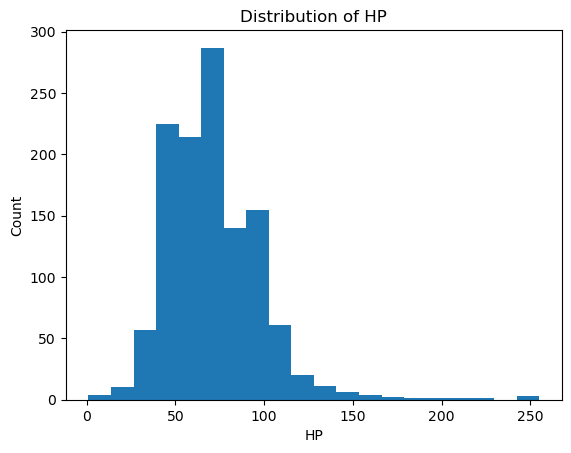

In [50]:
# Distribution of HP
plt.hist(national_dex['HP'], bins=20)
plt.xlabel('HP')
plt.ylabel('Count')
plt.title('Distribution of HP')
plt.show()  

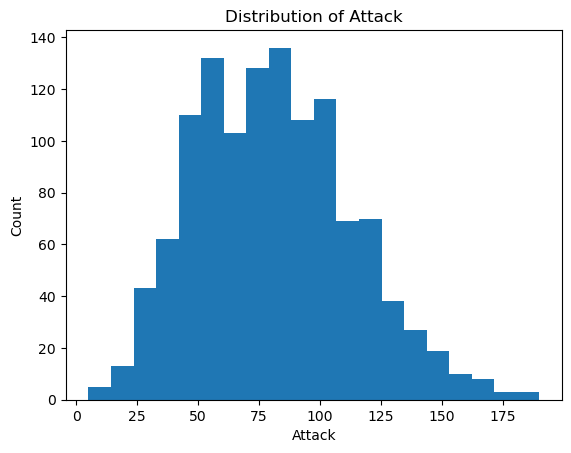

In [51]:
# Distribution of Attack 
plt.hist(national_dex['Attack'], bins=20)
plt.xlabel('Attack')
plt.ylabel('Count')
plt.title('Distribution of Attack')
plt.show()

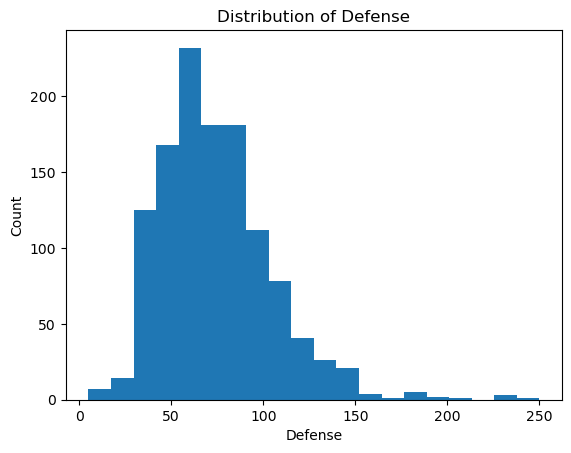

In [113]:
# Distribution of Defense
plt.hist(national_dex['Defense'], bins=20)
plt.xlabel('Defense')
plt.ylabel('Count')
plt.title('Distribution of Defense')
plt.show()

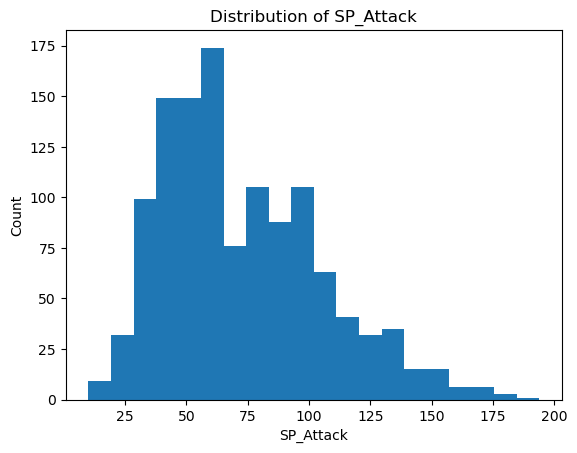

In [57]:
# Distribution of Sp.Atk
plt.hist(national_dex['SP_Attack'], bins=20)
plt.xlabel('SP_Attack')
plt.ylabel('Count')
plt.title('Distribution of SP_Attack')
plt.show()

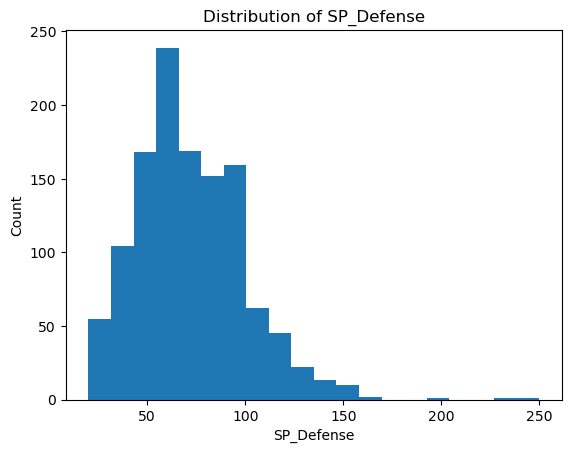

In [58]:
# Distribution of SP_Defense
plt.hist(national_dex['SP_Defense'], bins=20)
plt.xlabel('SP_Defense')
plt.ylabel('Count')
plt.title('Distribution of SP_Defense')
plt.show()

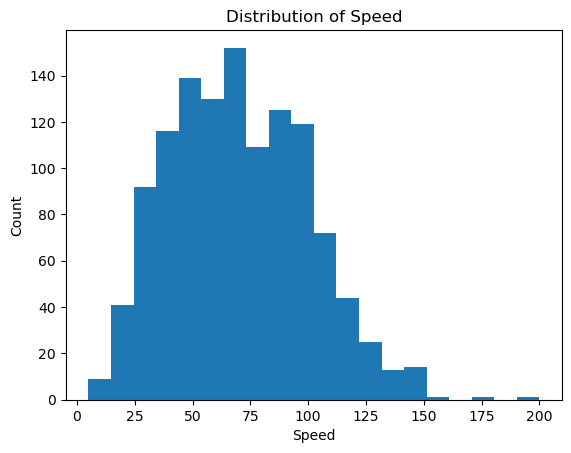

In [56]:
# Distribution of Speed
plt.hist(national_dex['Speed'], bins=20)
plt.xlabel('Speed')
plt.ylabel('Count')
plt.title('Distribution of Speed')
plt.show()

In [66]:
# Pokemon with max HP
max_hp = national_dex['HP'].max()
max_hp
max_hp_df = national_dex[national_dex['HP'] == 255]
max_hp_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
303,242,242_0,Blissey,Blissey,2,1.5,46.8,Normal,NaN,Natural Cure,...,75,135,55,540,3,0,0,0,0,0
1067,890,890_1,Eternatus,Eternamax Eternatus,8,100.0,0.0,Poison,Dragon,Pressure,...,125,250,130,1125,3,0,0,0,0,0


In [68]:
# Pokemon with min HP
min_hp = national_dex['HP'].min()
min_hp
min_hp_df = national_dex[national_dex['HP'] == 1]
min_hp_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
360,292,292_0,Shedinja,Shedinja,3,0.8,1.2,Bug,Ghost,Wonder Guard,...,30,30,40,236,2,0,0,0,0,0


In [81]:
# Pokemon with min Attack Stats
min_Attack = national_dex['Attack'].min()
min_Attack 
min_Attack_df = national_dex[national_dex['Attack'] == 5]
min_Attack_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
150,113,113_0,Chansey,Chansey,1,1.1,34.6,Normal,NaN,Natural Cure,...,35,105,50,450,2,0,0,0,0,0
540,440,440_0,Happiny,Happiny,4,0.6,24.4,Normal,NaN,Natural Cure,...,15,65,30,220,1,0,0,0,0,0


In [84]:
# Pokemon With Max Attack Stats
max_Attack = national_dex['Attack'].max()
max_Attack 
max_Attack_df = national_dex[national_dex['Attack'] == 190]
max_Attack_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
199,150,150_1,Mewtwo,Mega Mewtwo X,1,2.3,127.0,Psychic,Fighting,Steadfast,...,154,100,130,780,0,0,0,3,0,0


In [89]:
# Pokemon With Min Defense Stats
min_Defense = national_dex['Defense'].min()
min_Defense
min_Defense_df = national_dex[national_dex['Defense'] == 5]
min_Defense_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
150,113,113_0,Chansey,Chansey,1,1.1,34.6,Normal,NaN,Natural Cure,...,35,105,50,450,2,0,0,0,0,0
540,440,440_0,Happiny,Happiny,4,0.6,24.4,Normal,NaN,Natural Cure,...,15,65,30,220,1,0,0,0,0,0


In [91]:
# Pokemon With Max Defense Stats
max_Defense = national_dex['Defense'].max()
max_Defense
max_Defense_df = national_dex[national_dex['Defense'] == 250]
max_Defense_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
1067,890,890_1,Eternatus,Eternamax Eternatus,8,100.0,0.0,Poison,Dragon,Pressure,...,125,250,130,1125,3,0,0,0,0,0


In [93]:
# Pokemon With Min Speed Stats
min_Speed = national_dex['Speed'].min()
min_Speed
min_Speed_df = national_dex[national_dex['Speed'] == 5]
min_Speed_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
270,213,213_0,Shuckle,Shuckle,2,0.6,20.5,Bug,Rock,Sturdy,...,10,230,5,505,0,0,1,0,1,0
547,446,446_0,Munchlax,Munchlax,4,0.6,105.0,Normal,NaN,Pickup,...,40,85,5,390,1,0,0,0,0,0
931,771,771_0,Pyukumuku,Pyukumuku,7,0.3,1.2,Water,NaN,Innards Out,...,30,130,5,410,0,0,0,0,2,0


In [101]:
# Pokemon With Min Special Attack Stats
min_SP_Attack = national_dex['SP_Attack'].min()
min_SP_Attack 
min_SP_Attack_df = national_dex[national_dex['SP_Attack'] == 10]
min_SP_Attack_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
36,27,27_1,Sandshrew,Alolan Sandshrew,7,0.7,40.0,Ice,Steel,Snow Cloak,...,10,35,40,300,0,0,1,0,0,0
270,213,213_0,Shuckle,Shuckle,2,0.6,20.5,Bug,Rock,Sturdy,...,10,230,5,505,0,0,1,0,1,0
425,349,349_0,Feebas,Feebas,3,0.6,7.4,Water,NaN,Swift Swim,...,10,55,80,200,0,0,0,0,0,1
538,438,438_0,Bonsly,Bonsly,4,0.5,15.0,Rock,NaN,Sturdy,...,10,45,10,290,0,0,1,0,0,0


In [103]:
# Pokemon With Max Special Attack Stats
max_SP_Attack = national_dex['SP_Attack'].max()
max_SP_Attack 
max_SP_Attack_df = national_dex[national_dex['SP_Attack'] == 194]
max_SP_Attack_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
200,150,150_2,Mewtwo,Mega Mewtwo Y,1,1.5,33.0,Psychic,NaN,Insomnia,...,194,120,140,780,0,0,0,3,0,0


In [105]:
# Pokemon with min SP Defense
min_SP_Defense = national_dex['SP_Defense'].min()
min_SP_Defense 
min_SP_Defense_df = national_dex[national_dex['SP_Defense'] == 20]
min_SP_Defense_df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
13,10,10_0,Caterpie,Caterpie,1,0.3,2.9,Bug,NaN,Shield Dust,...,20,20,45,195,1,0,0,0,0,0
16,13,13_0,Weedle,Weedle,1,0.3,3.2,Bug,Poison,Shield Dust,...,20,20,50,195,0,0,0,0,0,1
172,129,129_0,Magikarp,Magikarp,1,0.9,10.0,Water,NaN,Swift Swim,...,15,20,80,200,0,0,0,0,0,1
225,174,174_0,Igglybuff,Igglybuff,2,0.3,1.0,Normal,Fairy,Cute Charm,...,40,20,15,210,1,0,0,0,0,0
391,318,318_0,Carvanha,Carvanha,3,0.8,20.8,Water,Dark,Rough Skin,...,65,20,65,305,0,1,0,0,0,0
476,386,386_1,Deoxys,Deoxys Attack Form,3,1.7,60.8,Psychic,NaN,Pressure,...,180,20,150,600,0,2,0,1,0,0
1045,874,874_0,Stonjourner,Stonjourner,8,2.5,520.0,Rock,NaN,Power Spot,...,20,20,70,470,0,0,2,0,0,0


In [97]:
# Median and Standard Deviation of HP Stat
median_hp = national_dex['HP'].median()
sd_hp = national_dex['HP'].std()
print(f"Median HP: {median_hp}")
print(f"Standard Deviation of HP: {sd_hp}")

Median HP: 70.0
Standard Deviation of HP: 26.77953894638634


In [112]:
# Median and Standard Deviation of Attack Stat
median_Attack = national_dex['Attack'].median()
print(f"Median Attack: {median_Attack}")
sd_Attack = national_dex['Attack'].std()
print(f"Standard Deviation of Attack: {sd_Attack}")

Median Attack: 80.0
Standard Deviation of Attack: 32.06321407609076


In [115]:
# Median and Standard Deviation of Defense Stat
median_Defense = national_dex['Defense'].median()
print(f"Median Defense: {median_Defense}")
sd_Defense = national_dex['Defense'].std()
print(f"Standard Deviation of Defense: {sd_Defense}")

Median Defense: 70.0
Standard Deviation of Defense: 30.591098189777714


In [126]:
median_Speed = national_dex['Speed'].median()
print(f"Median Speed: {median_Speed}")
sd_Speed = national_dex['Speed'].std()
print(f"Standard Deviation of Speed: {sd_Speed}")

Median Speed: 68.0
Standard Deviation of Speed: 30.28889138878792


In [122]:
# Median and Standard Deviation of Special Attack Stat
median_SP_Attack = national_dex['SP_Attack'].median()
print(f"Median SP_Attack: {median_SP_Attack}")
sd_SP_Attack = national_dex['SP_Attack'].std()
print(f"Standard Deviation of SP_Attack: {sd_SP_Attack}")

Median SP_Attack: 65.0
Standard Deviation of SP_Attack: 32.657015190601314


In [125]:
# Median and Standard Deviation of Special Defense Stat
median_SP_Defense = national_dex['SP_Defense'].median()
print(f"Median SP_Defense: {median_SP_Defense}")
sd_SP_Defense = national_dex['SP_Defense'].std()
print(f"Standard Deviation of SP_Defense: {sd_SP_Defense}")

Median SP_Defense: 70.0
Standard Deviation of SP_Defense: 27.54345760448888
